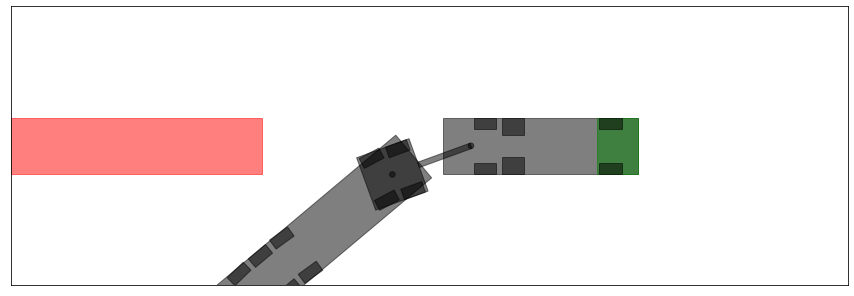

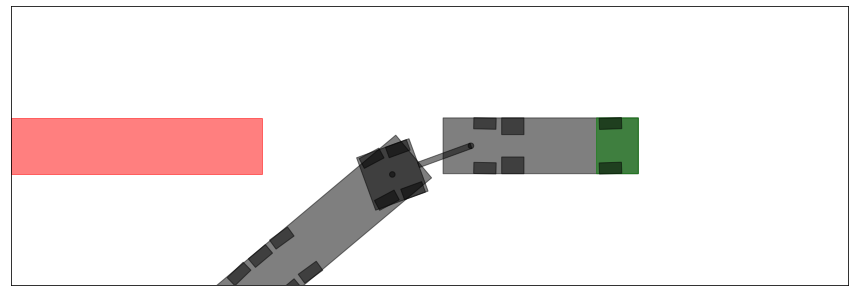

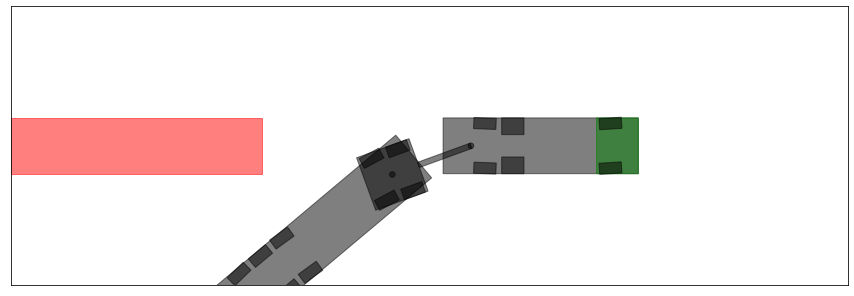

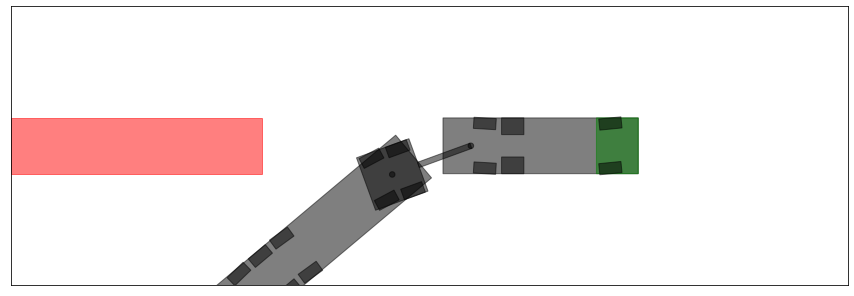

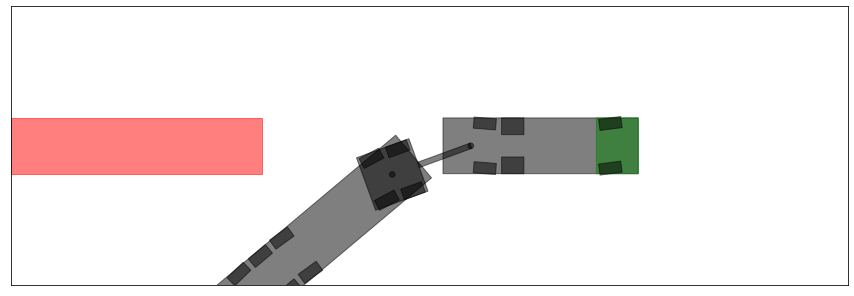

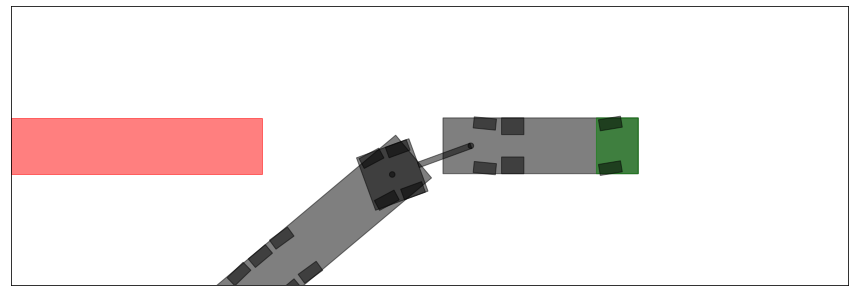

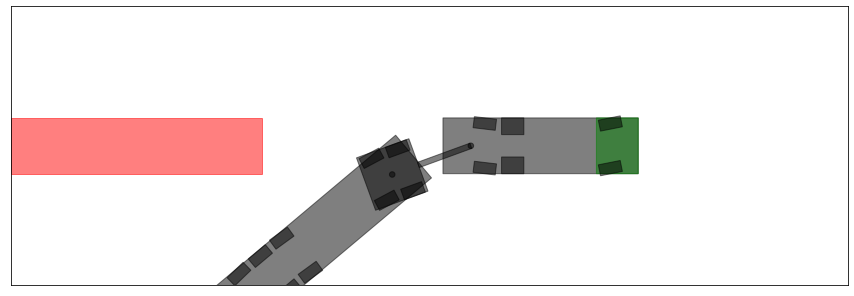

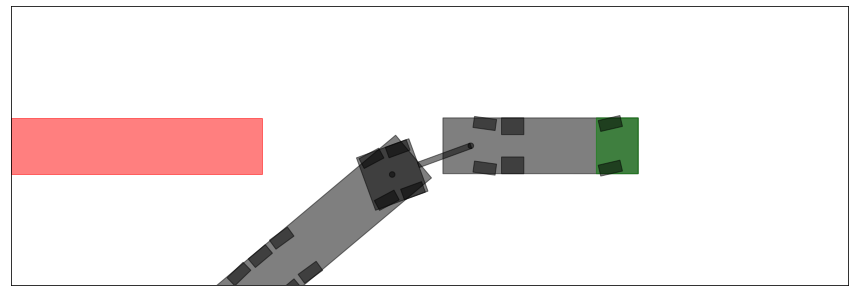

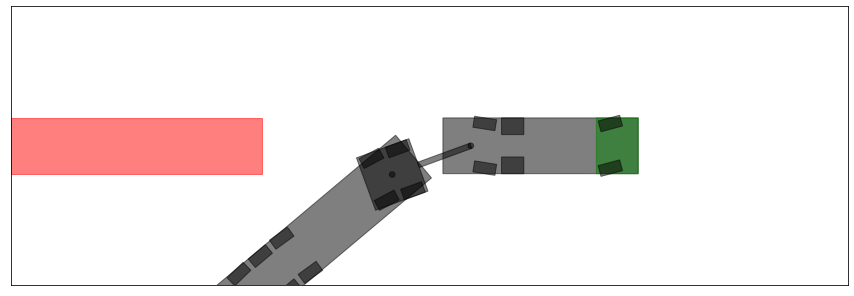

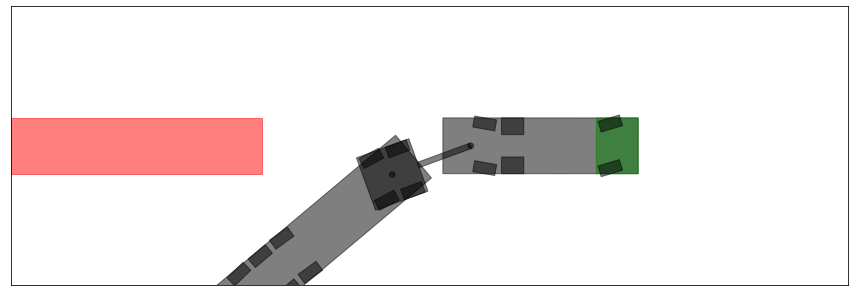

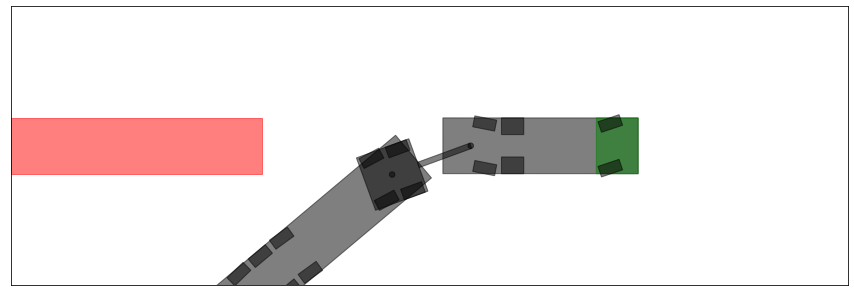

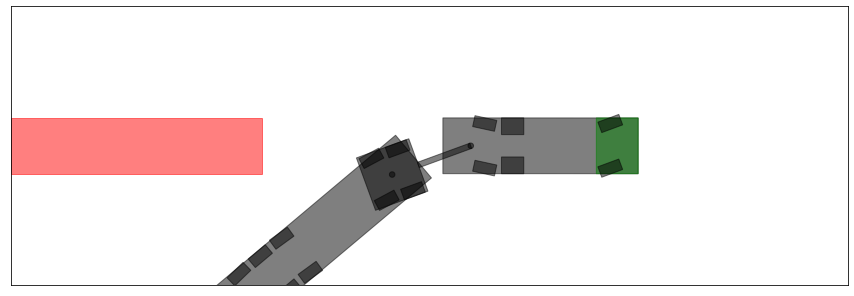

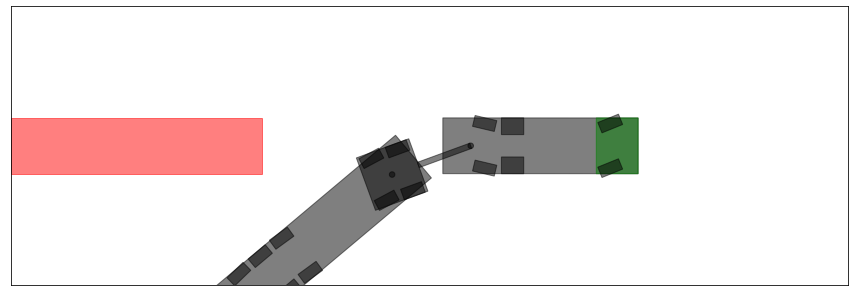

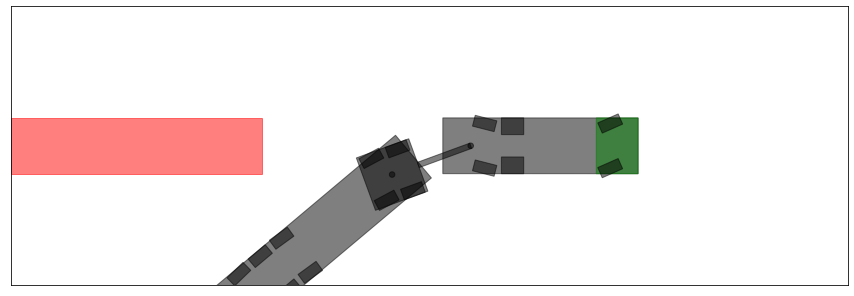

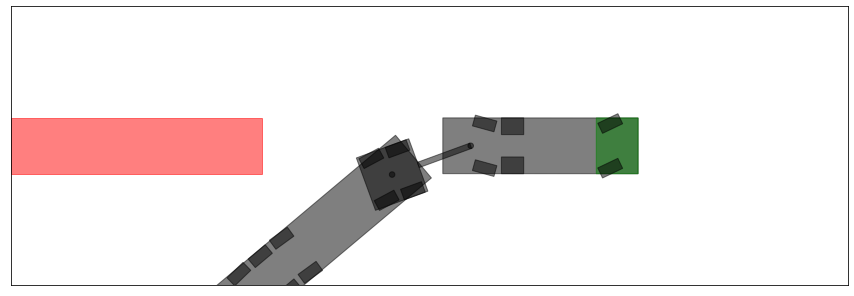

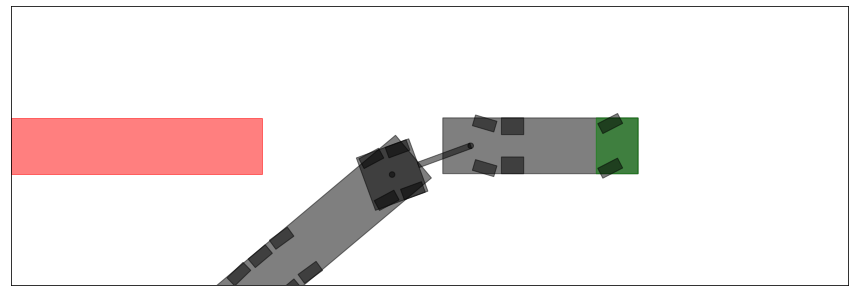

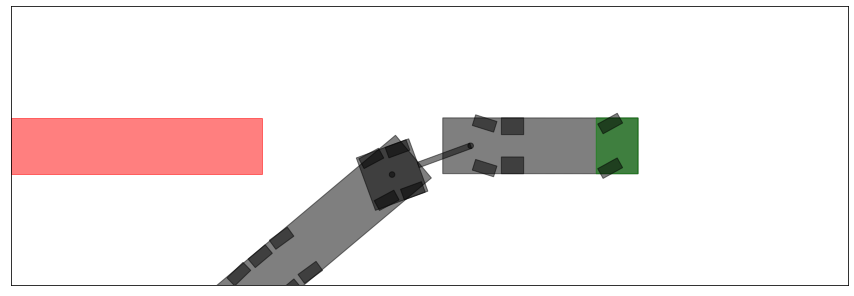

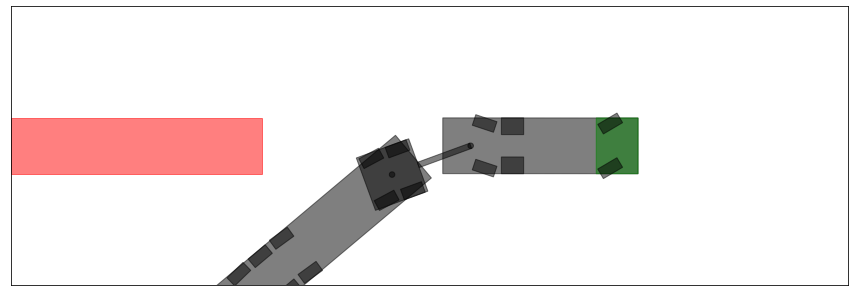

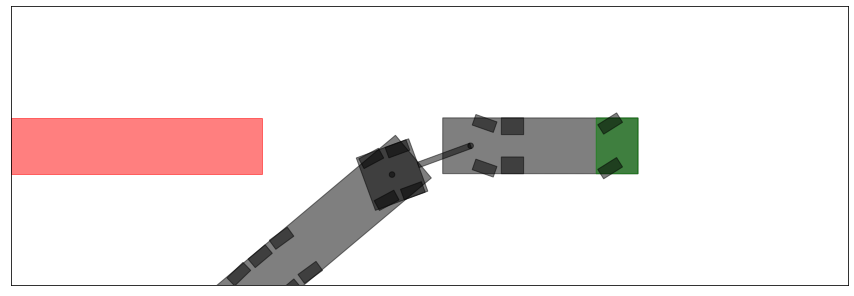

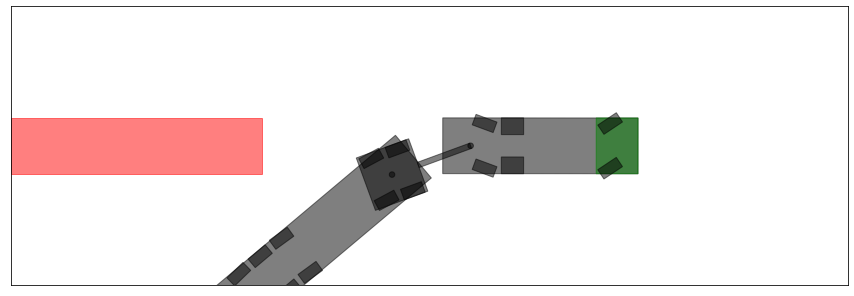

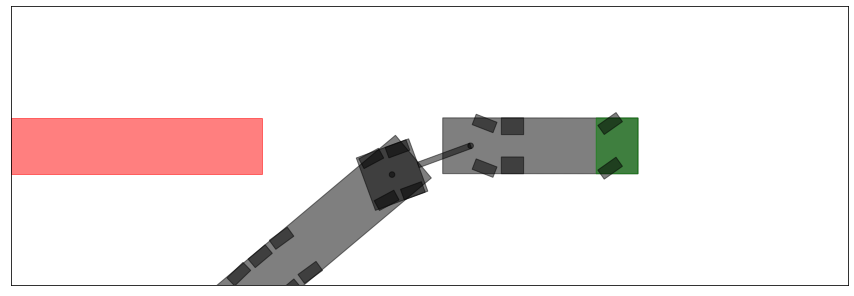

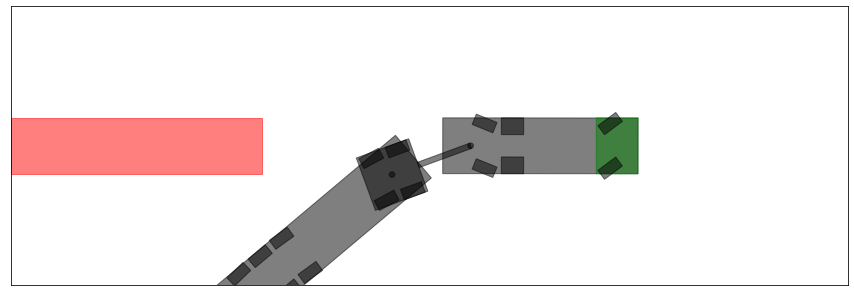

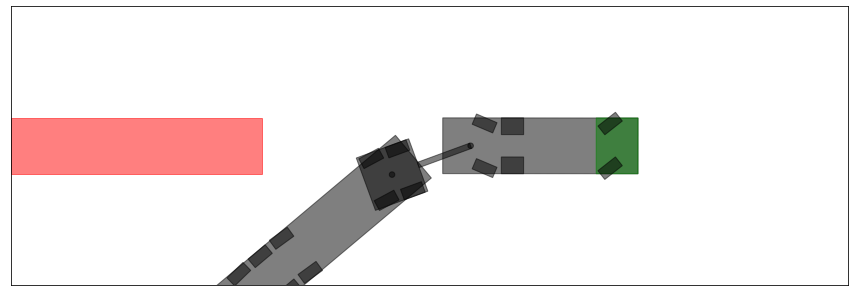

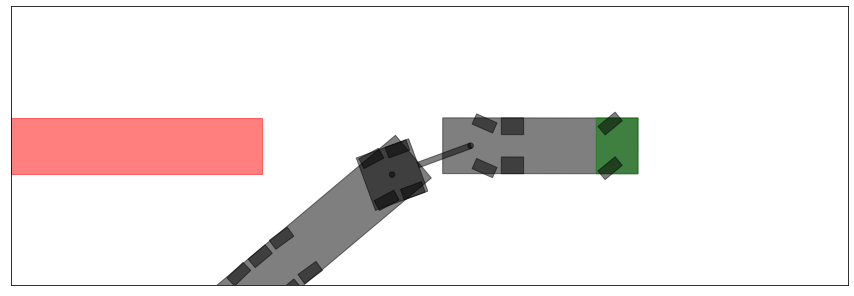

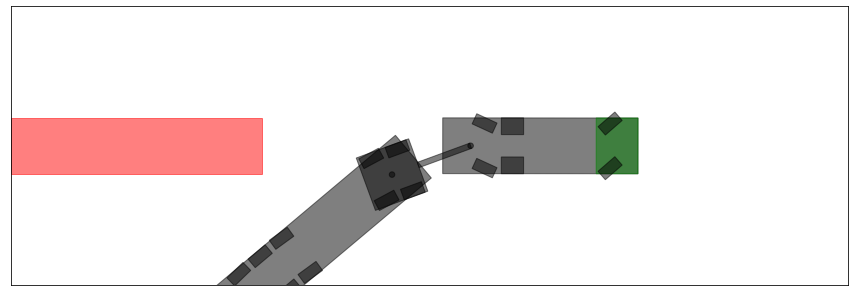

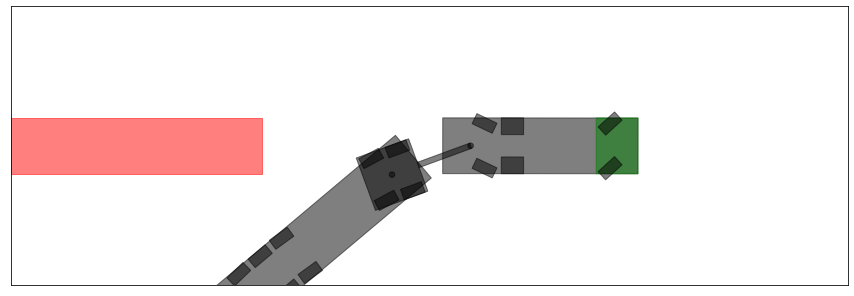

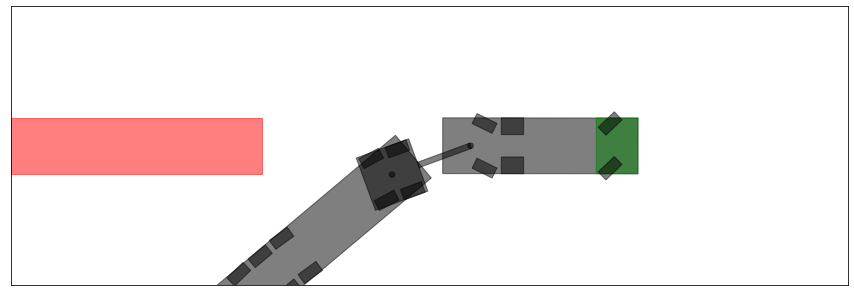

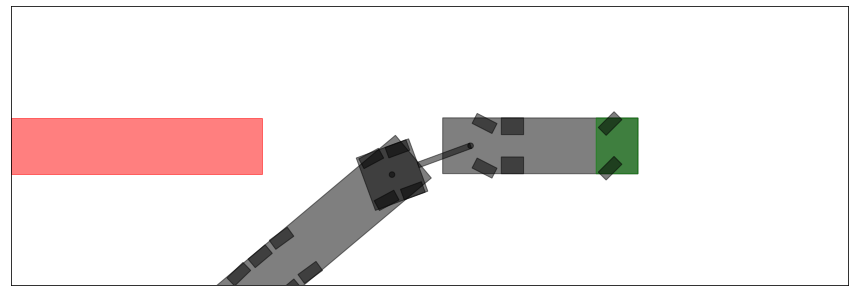

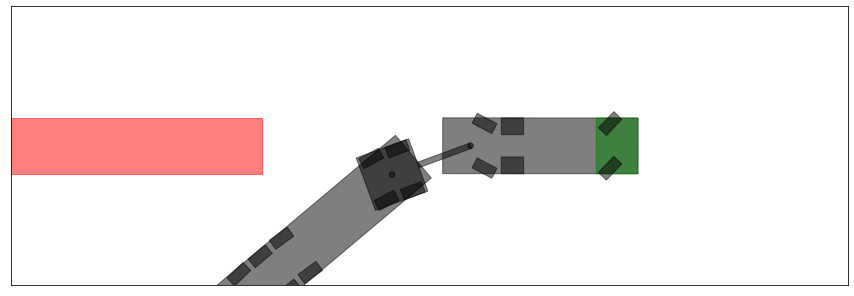

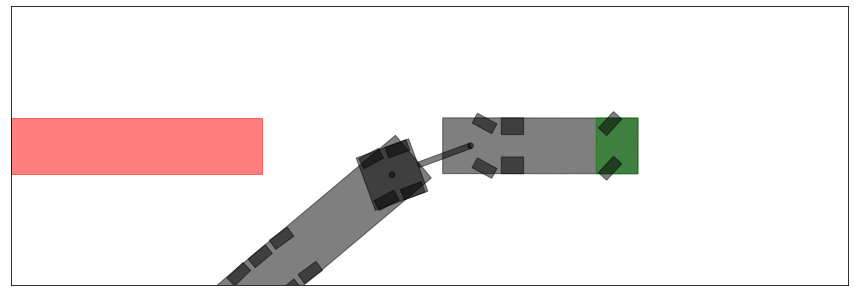

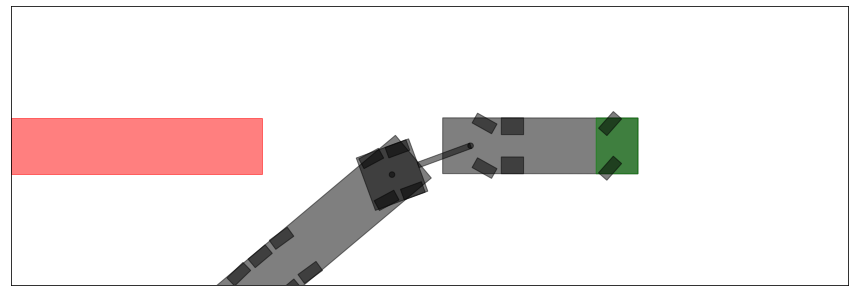

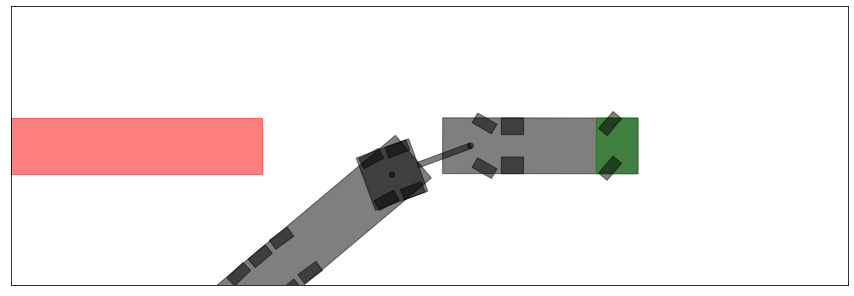

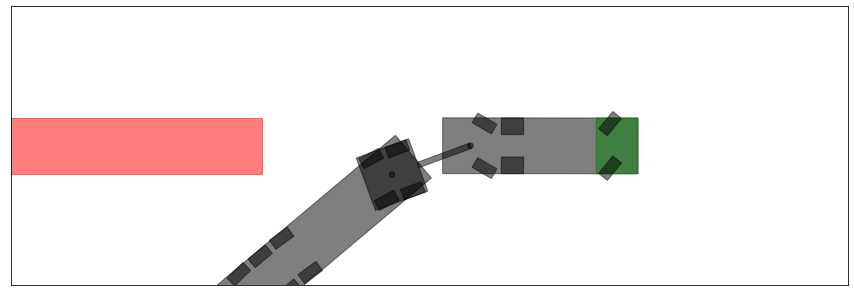

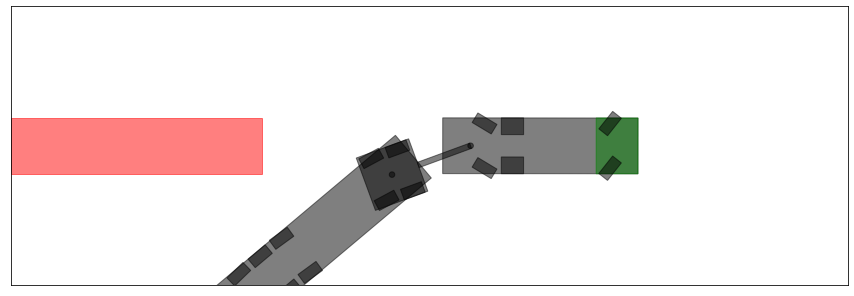

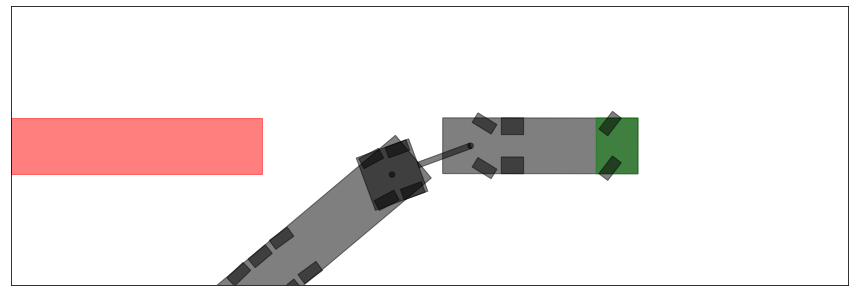

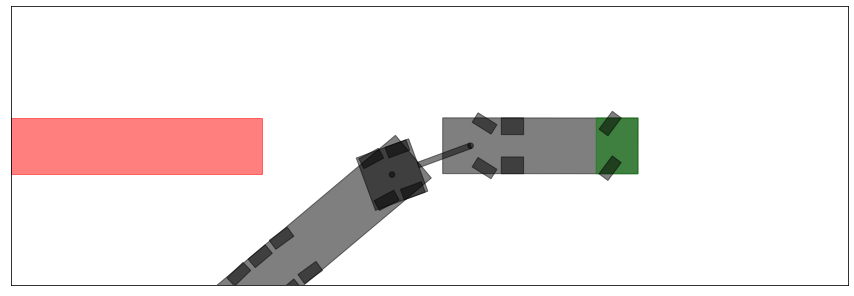

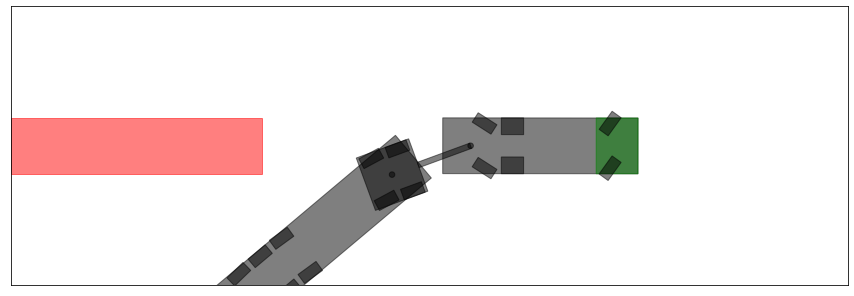

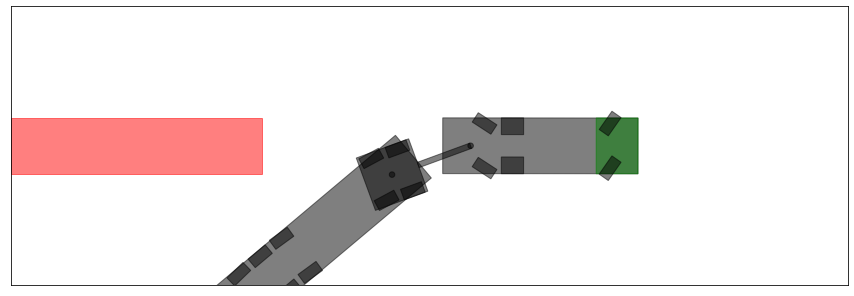

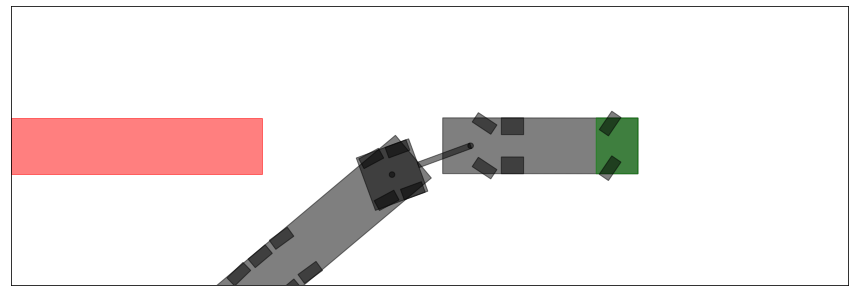

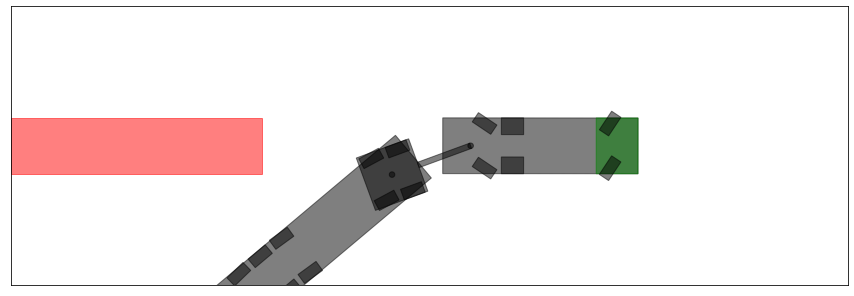

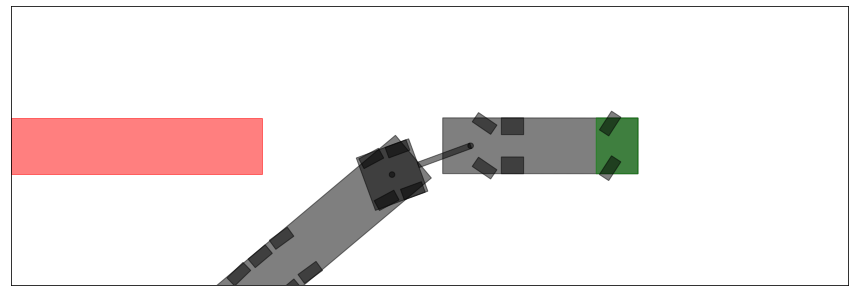

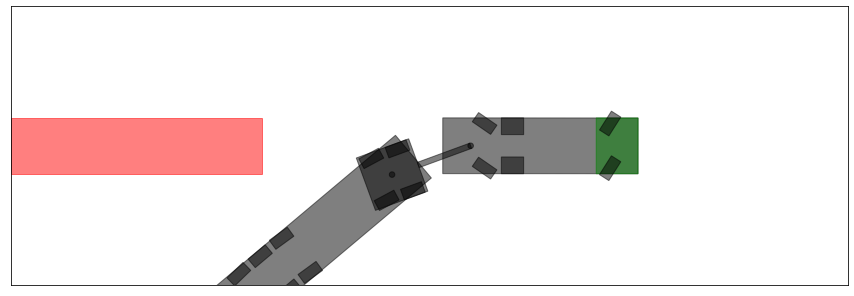

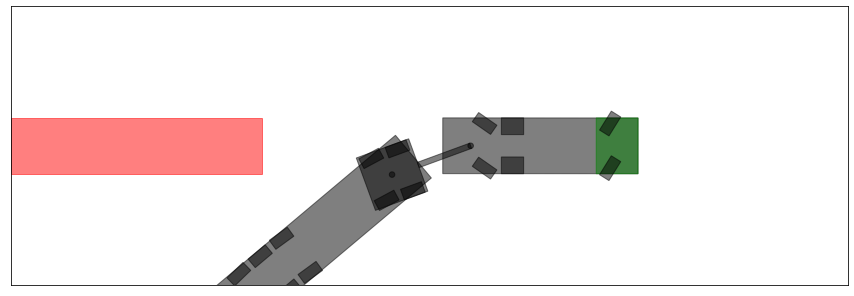

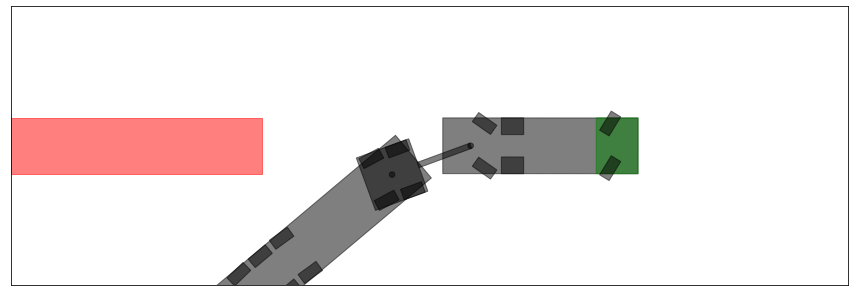

Process Process-2:
Traceback (most recent call last):
  File "/home/condauser/.conda/envs/dml/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/condauser/.conda/envs/dml/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-2-fee67255c9e6>", line 55, in visualize
    visualize_combination(visualisation_element)


KeyboardInterrupt: 

  File "/workspace/environment/necessary/visualize_combination_code.py", line 286, in visualize_combination
    plt.show()
  File "/home/condauser/.conda/envs/dml/lib/python3.7/site-packages/matplotlib/pyplot.py", line 269, in show
    return _show(*args, **kw)
  File "/home/condauser/.conda/envs/dml/lib/python3.7/site-packages/ipykernel/pylab/backend_inline.py", line 39, in show
    metadata=_fetch_figure_metadata(figure_manager.canvas.figure)
  File "/home/condauser/.conda/envs/dml/lib/python3.7/site-packages/IPython/core/display.py", line 306, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "/home/condauser/.conda/envs/dml/lib/python3.7/site-packages/IPython/core/formatters.py", line 180, in format
    data = formatter(obj)
  File "</home/condauser/.conda/envs/dml/lib/python3.7/site-packages/decorator.py:decorator-gen-9>", line 2, in __call__
  File "/home/condauser/.conda/envs/dml/lib/python3.7/site-packages/IPython/core/formatters.py", li

In [2]:
#!/usr/bin/env python

###############
# Main method #
###############

__author__ = "Pär-Love Palm, Felix Steimle, Jakob Wadman, Veit Wörner"
__copyright__ = "Copyright 2019, Chalmers University of Technology"
__credits__ = ["Pär-Love Palm", "Felix Steimle", "Jakob Wadman", "Veit Wörner"]
__license__ = "GPL"
__version__ = "0.9b"
__maintainer__ = "Veit Wörner"
__email__ = "veit@student.chalmers.se"
__status__ = "Production"

from numpy import array
from multiprocessing import Process, Queue

from visualize_combination_code import *
from Simulate_combination_code import *
from utility_functions import *

truck_translation = array([np.float(18),np.float(5)])
truck_rotation = 0
first_trailer_rotation = 20
second_trailer_rotation = 20
destination_translation = array([4.5,5])
destination_rotation = 180
number_trailers = 2
step_size = 1e-2

step_number = 1
plotting_interval = 1e2

trailer_cog_list = [array([1.5, 5]), array([7, 5])]
trailer_shape_list = [array([3,2]), array([4,2])]
trailer_config_length = 9
trailer_rotation_list = [0, 90]

simulate_combination = Simulate_combination(truck_translation,\
                                            truck_rotation,\
                                            first_trailer_rotation,\
                                            second_trailer_rotation,\
                                            destination_translation,\
                                            destination_rotation,\
                                            number_trailers,\
                                            step_size)    
        
def visualize(visualisation_queue):
    while True:
        print('') # Deleting this line causes the system to plot in the shell instead of in Jupyter 
        visualisation_element = visualisation_queue.get()
        if (visualisation_element == 'DONE'):
            break
        visualize_combination(visualisation_element)
                
def main():
    visualisation_queue = Queue()
    overlap_queue = Queue()
    visualisation_process = Process(target=visualize, args=((visualisation_queue),))
    visualisation_process.daemon = True
    visualisation_process.start()
    
    for step_number in range(np.int(1e4)):
        velocity = -0.1+np.sin(step_number/1e3*np.pi)
        steering_percentage = np.sin(step_number/1e2*np.pi)
            
        truck_translation,\
        truck_rotation,\
        first_trailer_rotation,\
        second_trailer_rotation = simulate_combination.run(velocity,steering_percentage)
        
        visualisation_queue.put([truck_translation, 
                                 truck_rotation,       
                                 first_trailer_rotation,      
                                 second_trailer_rotation,      
                                 steering_percentage,                 
                                 destination_translation,          
                                 destination_rotation,          
                                 number_trailers])
        
        overlap_queue.put(destination_overlap(trailer_cog_list,\
                                              [first_trailer_rotation,second_trailer_rotation],\
                                              destination_translation,\
                                              destination_rotation,\
                                              trailer_shape_list = trailer_shape_list,\
                                              trailer_config_length = trailer_config_length))
        
    visualisation_queue.put('DONE')    
    visualisation_process.join()
    
if __name__=='__main__':
    main()    